In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')

from simulation.analyse import get_win_probabilities, get_simulations
from features.data_provider import get_whole_dataset
from models.score_model import get_model
from simulation.predictor import MaxProbabilityScorePredictor
from simulation.simulation import run_simulation, run_actual_tournament_simulation
from db.simulation_table import store_simulation_results, delete_all

from notebook_helpers import plot_bank_and_bets, run_unit_strategy, run_kelly_strategy

In [2]:
home = get_whole_dataset("home_score", filter_start="2014-06-12")
away = get_whole_dataset("away_score", filter_start="2014-06-12")
X = pd.concat([home[0], away[0]])
y = pd.concat([home[1], away[1]])
model = get_model(X=X, y=y)
predictor = MaxProbabilityScorePredictor(model)

In [3]:
match_template = pd.read_csv('data/original/wc_2014_real.csv')
run_actual_tournament_simulation(match_template, predictor)
store_simulation_results("data/simulations/tmp/single_simulation_wc2014.csv")
delete_all()

In [4]:
tournament_simulation = pd.read_csv('data/simulations/tmp/single_simulation_wc2014.csv')
tournament_simulation["true_outcome"] = np.sign(tournament_simulation["home_score"] - tournament_simulation["away_score"])
tournament_simulation

,Unnamed: 0,id,match_id,date,home_team,away_team,home_score,away_score,outcome,home_win_prob,draw_prob,away_win_prob,true_outcome
0,0,1,0,2014-06-12,Brazil,Croatia,3,1,1,0.550940,0.237500,0.211557,1
1,1,2,1,2014-06-13,Chile,Australia,3,1,1,0.630017,0.224312,0.145668,1
2,2,3,2,2014-06-13,Mexico,Cameroon,1,0,1,0.445190,0.291330,0.263479,1
3,3,4,3,2014-06-13,Spain,Netherlands,1,5,1,0.443823,0.272810,0.283367,-1
4,4,5,4,2014-06-14,Colombia,Greece,3,0,1,0.435589,0.295679,0.268731,1
5,5,6,5,2014-06-14,England,Italy,1,2,-1,0.340028,0.291461,0.368510,-1
6,6,7,6,2014-06-14,Ivory Coast,Japan,2,1,-1,0.349817,0.266089,0.384094,1
7,7,8,7,2014-06-14,Uruguay,Costa Rica,1,3,1,0.625280,0.241900,0.132819,-1
8,8,9,8,2014-06-15,Argentina,Bosnia and Herzegovina,2,1,1,0.710897,0.176152,0.112925,1
9,9,10,9,2014-06-15,France,Honduras,3,0,1,0.650779,0.250333,0.098888,1


In [5]:
match_bets = pd.read_csv('data/original/wc_2014_bets.csv')

Profit: 22.125%
Balance:  78.16


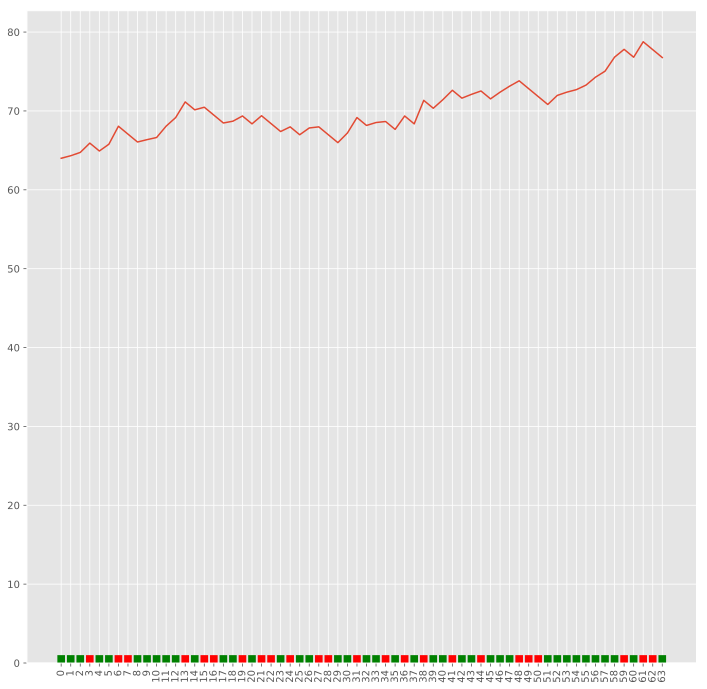

In [6]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
run_unit_strategy(y_pred, y_true, odds)

Profit: 362.6366%
Balance:  296.087453942


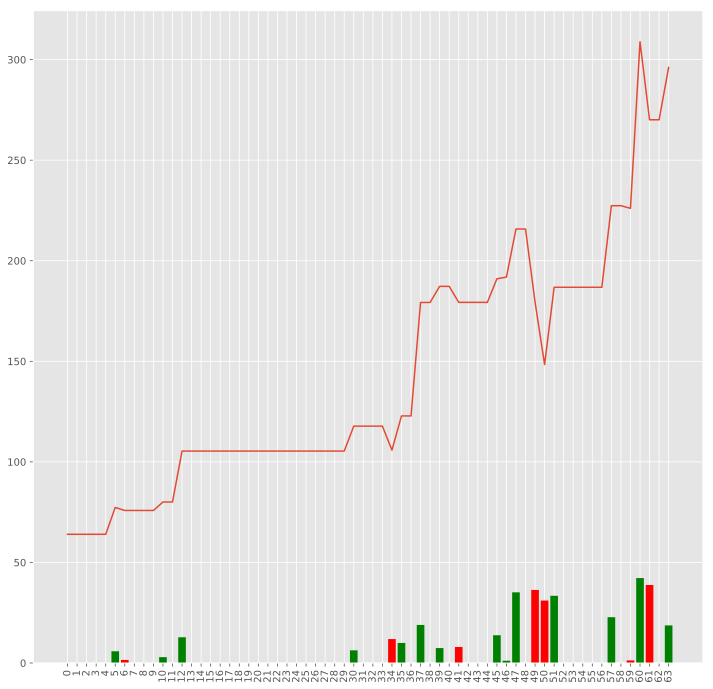

In [7]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
probabilities = tournament_simulation[["home_win_prob", "draw_prob", "away_win_prob"]].values
run_kelly_strategy(y_pred, y_true, odds, probabilities)

In [8]:
X.shape[0]

8912